## Notebook Lección 3

### Objetivos Lección 3: 

1.	Entender el significado económico de la curva de rendimiento y las principales teorías que la explican. 
2.	Entender cómo se construye la curva cero cupón. 
3.	Conocer y aplicar las técnicas básicas para interpolar la curva de rendimientos.  


### Ejercicio

Use la técnica de los B-Splines para obtener:

1. La curva cero cupón nominal
2. La curva cero cupón real 
3. El breakeven inflation

Para construir la curva de rendimientos a partir de ciertos bonos y la fecha de evaluación es necesario seguir ciertos pasos que veremos a continuación:

# Creación flujos


Primero debemos importar las librerías necesarias, definir el pp y crear una tabla con los bonos.

In [1]:
import numpy as np
import pandas as pd
import math
from pandas.tseries.offsets import DateOffset

pp =0.01
df = pd.read_csv("data.csv", encoding ='utf-8', sep = ";")
df

,Ticker,Descripción,Emisión,Vencimiento,Cupón,Precio Sucio
0,9128285B Govt,United States Treasury Note/Bond,1/10/2018,30/09/2020,2.750,99.789062
1,9128285A Govt,United States Treasury Note/Bond,17/09/2018,15/09/2021,2.750,99.515625
2,9128284X Govt,United States Treasury Note/Bond,31/08/2018,31/08/2023,2.750,99.035156
3,9128284Y Govt,United States Treasury Note/Bond,31/08/2018,31/08/2020,2.625,99.585938
4,9128284Z Govt,United States Treasury Note/Bond,31/08/2018,31/08/2025,2.750,98.101562
...,...,...,...,...,...,...
305,912810EC Govt,United States Treasury Note/Bond,15/02/1989,15/02/2019,8.875,101.886719
306,912810EB Govt,United States Treasury Note/Bond,22/11/1988,15/11/2018,9.000,100.304688
307,9128285F Govt,United States Treasury Note/Bond,15/10/2018,15/10/2021,2.875,99.855469
308,9128285D Govt,United States Treasury Note/Bond,1/10/2018,30/09/2023,2.875,99.531250


Lo indexamos según su vencimiento y lo ordenamos cronologicamente.

In [2]:
df.index = pd.to_datetime(df['Vencimiento'])
df = df.sort_index()
df

<ipython-input-2-a5869b53164b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index = pd.to_datetime(df['Vencimiento'])


,Ticker,Descripción,Emisión,Vencimiento,Cupón,Precio Sucio
Vencimiento,,,,,,
2018-11-15,912828M6 Govt,United States Treasury Note/Bond,16/11/2015,15/11/2018,1.250,99.968750
2018-11-15,912810EB Govt,United States Treasury Note/Bond,22/11/1988,15/11/2018,9.000,100.304688
2018-11-15,912828JR Govt,United States Treasury Note/Bond,17/11/2008,15/11/2018,3.750,100.058594
2018-11-30,912828RT Govt,United States Treasury Note/Bond,30/11/2011,30/11/2018,1.375,99.933594
2018-11-30,912828A3 Govt,United States Treasury Note/Bond,2/12/2013,30/11/2018,1.250,99.921875
...,...,...,...,...,...,...
2047-08-15,912810RY Govt,United States Treasury Note/Bond,15/08/2017,15/08/2047,2.750,88.195312
2047-11-15,912810RZ Govt,United States Treasury Note/Bond,15/11/2017,15/11/2047,2.750,88.132812
2048-02-15,912810SA Govt,United States Treasury Note/Bond,15/02/2018,15/02/2048,3.000,92.695312


Definimos la fecha de valoración. Debemos asegurarnos que los bonos venzan despúes de esta.

In [3]:
fecha_valoracion = pd.to_datetime("2018-10-31")
df = df[df.index>fecha_valoracion]
df['FV'] = 100
df['Cupón'] = df['Cupón']*pp
df

,Ticker,Descripción,Emisión,Vencimiento,Cupón,Precio Sucio,FV
Vencimiento,,,,,,,
2018-11-15,912828M6 Govt,United States Treasury Note/Bond,16/11/2015,15/11/2018,0.01250,99.968750,100
2018-11-15,912810EB Govt,United States Treasury Note/Bond,22/11/1988,15/11/2018,0.09000,100.304688,100
2018-11-15,912828JR Govt,United States Treasury Note/Bond,17/11/2008,15/11/2018,0.03750,100.058594,100
2018-11-30,912828RT Govt,United States Treasury Note/Bond,30/11/2011,30/11/2018,0.01375,99.933594,100
2018-11-30,912828A3 Govt,United States Treasury Note/Bond,2/12/2013,30/11/2018,0.01250,99.921875,100
...,...,...,...,...,...,...,...
2047-08-15,912810RY Govt,United States Treasury Note/Bond,15/08/2017,15/08/2047,0.02750,88.195312,100
2047-11-15,912810RZ Govt,United States Treasury Note/Bond,15/11/2017,15/11/2047,0.02750,88.132812,100
2048-02-15,912810SA Govt,United States Treasury Note/Bond,15/02/2018,15/02/2048,0.03000,92.695312,100


Haremos una copia de esta tabla para poder hacerle ciertos cambios sin necesidad de alterar la original:

In [4]:
copia_df = df.copy(deep=True)


A esta copia le agregaremos un ejemplo de juguete que vence en la fecha de valoración:

In [5]:
bono_juguete = pd.DataFrame({'Ticker': 'USTN','Descripción':'Matured Bond','Emisión':fecha_valoracion,'Vencimiento':fecha_valoracion,
	'Cupón':'0','Precio Sucio':	'100.0','FV':100.0},index=[0])

copia_df = pd.concat([bono_juguete,copia_df]).reset_index(drop=True) # se coloca de primero
copia_df.index = pd.to_datetime(copia_df['Vencimiento']) # Le aplicamos los mismos indices del df original
copia_df

<ipython-input-5-aa22c54bc54e>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  copia_df.index = pd.to_datetime(copia_df['Vencimiento']) # Le aplicamos los mismos indices del df original


,Ticker,Descripción,Emisión,Vencimiento,Cupón,Precio Sucio,FV
Vencimiento,,,,,,,
2018-10-31,USTN,Matured Bond,2018-10-31 00:00:00,2018-10-31 00:00:00,0,100.0,100.0
2018-11-15,912828M6 Govt,United States Treasury Note/Bond,16/11/2015,15/11/2018,0.0125,99.96875,100.0
2018-11-15,912810EB Govt,United States Treasury Note/Bond,22/11/1988,15/11/2018,0.09,100.304688,100.0
2018-11-15,912828JR Govt,United States Treasury Note/Bond,17/11/2008,15/11/2018,0.0375,100.058594,100.0
2018-11-30,912828RT Govt,United States Treasury Note/Bond,30/11/2011,30/11/2018,0.01375,99.933594,100.0
...,...,...,...,...,...,...,...
2047-08-15,912810RY Govt,United States Treasury Note/Bond,15/08/2017,15/08/2047,0.0275,88.195312,100.0
2047-11-15,912810RZ Govt,United States Treasury Note/Bond,15/11/2017,15/11/2047,0.0275,88.132812,100.0
2048-02-15,912810SA Govt,United States Treasury Note/Bond,15/02/2018,15/02/2048,0.03,92.695312,100.0


Proyectemos ahora los flujos de caja:


Definimos los periodos y creamos una nueva tabla donde estarán los bonos y las fechas donde se pagarán

In [6]:
periodos = (df.index.max()-fecha_valoracion) #Tomamos la fecha más lejana y vemos su diferencia con la fecha donde valoramos
periodos

Timedelta('10881 days 00:00:00')

Conseguimos el número de pagos tomando la fecha más lejana y le restamos la fecha de valoración,  esto lo dividimos por 182.5 lo que equivale a medio año en días, lo cual es nuestra frecuencia.


In [7]:

periodos = (df.index.max()-fecha_valoracion) 
periodos = math.ceil(periodos.days/182.5)
flujos = pd.DataFrame(data = [100], index = [fecha_valoracion], columns= ['bono0'])

In [8]:
for i in range(len(df)): 
    date_range = pd.bdate_range(end= df.index[i], periods = periodos, freq = pd.DateOffset(months=6), closed='right') 
    date_range = date_range[date_range >= fecha_valoracion]
    serie1 = pd.Series([df['FV'].iloc[i]*df['Cupón'].iloc[i]/2]*(len(date_range)-1)+[df['FV'].iloc[i]*(1+df['Cupón'].iloc[i]/2)], index = date_range, name = 'bono' + str(i+1))
    flujos = pd.concat([flujos, serie1], axis = 1)
    flujos


<ipython-input-8-8aecb4f07a73>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.bdate_range(end= df.index[i], periods = periodos, freq = pd.DateOffset(months=6), closed='right')
<ipython-input-8-8aecb4f07a73>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.bdate_range(end= df.index[i], periods = periodos, freq = pd.DateOffset(months=6), closed='right')
<ipython-input-8-8aecb4f07a73>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.bdate_range(end= df.index[i], periods = periodos, freq = pd.DateOffset(months=6), closed='right')
<ipython-input-8-8aecb4f07a73>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.bdate_range(end= df.index[i], periods = periodos, freq = pd.DateOffset(months=6), closed='right')
<ipython-input-8-8aecb4f07a73>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date

Así como hicimos antes, creamos una copia de flujos, esto nos servirá para hacer cálculos más tarde.

In [9]:
copia_flujos = flujos.copy(deep=True)

Remplazamos las casillas vacías de flujos por ceros

In [10]:
flujos = flujos.fillna(0)
flujos.T

,2018-10-31,2018-11-15,2018-11-30,2018-12-15,2018-12-30,2019-01-15,2019-01-31,2019-02-15,2019-02-28,2019-03-15,...,2046-05-15,2046-08-15,2046-11-15,2047-02-15,2047-05-15,2047-08-15,2047-11-15,2048-02-15,2048-05-15,2048-08-15
bono0,100.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0,0.0000,0.0
bono1,0.0,100.6250,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0,0.0000,0.0
bono2,0.0,104.5000,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0,0.0000,0.0
bono3,0.0,101.8750,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0,0.0000,0.0
bono4,0.0,0.0000,100.6875,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bono306,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.375,0.0,0.0,...,0.0000,1.375,0.0000,1.375,0.0000,101.375,0.0000,0.0,0.0000,0.0
bono307,0.0,1.3750,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,1.3750,0.000,1.3750,0.000,1.3750,0.000,101.3750,0.0,0.0000,0.0
bono308,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.500,0.0,0.0,...,0.0000,1.500,0.0000,1.500,0.0000,1.500,0.0000,101.5,0.0000,0.0
bono309,0.0,1.5625,0.0000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,1.5625,0.000,1.5625,0.000,1.5625,0.000,1.5625,0.0,101.5625,0.0


Calculamos los bonos que han vencido para cada fecha. Para ello tenemos la condición de que los valores sean mayores o iguales a 100.

In [11]:
flujos.loc[:,'vencidos'] = flujos[flujos >= 100].count(axis = 1).cumsum()


Y contamos los días transcurridos a la fecha de evaluación según cada fila.

In [12]:
flujos.loc[:,'dias'] = (flujos.index - flujos.index[0]).days

flujos.T

,2018-10-31,2018-11-15,2018-11-30,2018-12-15,2018-12-30,2019-01-15,2019-01-31,2019-02-15,2019-02-28,2019-03-15,...,2046-05-15,2046-08-15,2046-11-15,2047-02-15,2047-05-15,2047-08-15,2047-11-15,2048-02-15,2048-05-15,2048-08-15
bono0,100.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
bono1,0.0,100.6250,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
bono2,0.0,104.5000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
bono3,0.0,101.8750,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
bono4,0.0,0.0000,100.6875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bono308,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.5,0.0,0.0,...,0.0000,1.5,0.0000,1.5,0.0000,1.5,0.0000,101.5,0.0000,0.0
bono309,0.0,1.5625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5625,0.0,1.5625,0.0,1.5625,0.0,1.5625,0.0,101.5625,0.0
bono310,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1.5,0.0,0.0,...,0.0000,1.5,0.0000,1.5,0.0000,1.5,0.0000,1.5,0.0000,101.5
vencidos,1.0,4.0000,7.0000,8.0,11.0,12.0,15.0,18.0,21.0,22.0,...,302.0000,303.0,304.0000,305.0,306.0000,307.0,308.0000,309.0,310.0000,311.0


# Número de splines

A la hora de interpolar es necesario tener ciertos parámetros claros, entre ellos saber cuantos splines serán usados. Definamos esto valores

In [13]:
num_splines = 8
num_bonos = (len(flujos.columns)-2)  # Se resta 2 al número de columnas de flujos ya que descontamos la columna 'dias' y 'vencidos' 
num_bonos_nodo = num_bonos/ (num_splines - 3) #El 3 se resta a modo de obtener un entero

In [14]:

index =  flujos[flujos['vencidos'] >= num_bonos_nodo].index.values[0] #Da el indice donde se cumple por primera vez  la condicion  
#de que haya al menos el promedio de bonos por nodo. Esto es una fecha
aux = flujos.index.get_loc(index)  # Dice que posición en números cardinales es ese indice

Definimos tambien los valores iniciales para iterar

In [15]:
value1 = -2000
value2 = -1000
value3 = -500
value4 = 0
value5 =(flujos['dias'][aux-1] + flujos['dias'][aux ])/2 #418

In [16]:
#Creamos listas que serán usadas como columnas más tarde
valores1 = [value1]
valores2 = [value2]
valores3 = [value3]
valores4 = [value4]
valores5 = [value5]
valoresAux = [aux]


In [17]:

for n in range(num_splines+1):

    #Los valores nuevos se basan en los anteriores:
    aux_viejo = aux
    value1 = value2
    value2 = value3
    value3 = value4
    value4 = value5

    # Si el producto que evaluamos supera el número de bonos que tenemos, 
    # le sumamos 10000 al valor 5 o simplemente tomamos el último indice

    if num_bonos_nodo *( n+2 ) >= num_bonos:
        aux = float(flujos.shape[0]) # cantidad de fechas
        if aux == aux_viejo:
            value5 += 10000
        else:
            aux_anterior = int(aux - 1)
            value5 =  flujos['dias'][aux_anterior]

    #En caso contrario 
    else:
        index = flujos[flujos['vencidos'] >=  num_bonos_nodo *( n+2 )].index.values[0]
        aux = flujos.index.get_loc(index)
        value5 =  (flujos['dias'][int(aux-1)] + flujos['dias'][int(aux)])/2

   


    valores1.append(value1)
    valores2.append(value2)
    valores3.append(value3)
    valores4.append(value4)
    valores5.append(value5)
    valoresAux.append(aux)


Despues de las iteraciones se tienen los siguientes resultados:

In [18]:
valores = pd.DataFrame({'Valor1':valores1,'Valor2':valores2,'Valor3':valores3,'Valor4':valores4,'Valor5':valores5, 'Aux':valoresAux})
valores

,Valor1,Valor2,Valor3,Valor4,Valor5,Aux
0,-2000.0,-1000.0,-500.0,0.0,417.5,28.0
1,-1000.0,-500.0,0.0,417.5,873.5,58.0
2,-500.0,0.0,417.5,873.5,1537.0,92.0
3,0.0,417.5,873.5,1537.0,2799.0,139.0
4,417.5,873.5,1537.0,2799.0,10881.0,228.0
5,873.5,1537.0,2799.0,10881.0,20881.0,228.0
6,1537.0,2799.0,10881.0,20881.0,30881.0,228.0
7,2799.0,10881.0,20881.0,30881.0,40881.0,228.0
8,10881.0,20881.0,30881.0,40881.0,50881.0,228.0
9,20881.0,30881.0,40881.0,50881.0,60881.0,228.0


Ahora creamos recursivamente las funciones spline. 

In [19]:
# Función grado 1
def bspline1(k0,k1,k2,dte):
    if dte <= k0 or dte >= k2:
        bspline = 0
    if dte >k0 and dte <= k1:
        bspline = (dte - k0) / ((k1 - k0) * (k2 - k0))
    if dte >k1 and dte < k2:
        bspline = (k2 - dte) / ((k2 - k0) * (k2 - k1))
    
    return bspline

In [20]:
# Función grado 2
def bspline2(k0, k1, k2, k3, dte):
    bspline =((dte - k0) * bspline1(k0, k1, k2, dte) + (k3 - dte) * bspline1(k1, k2, k3, dte)) / (k3 - k0)
    return bspline

In [21]:
# Función grado 3
def bspline3(k0, k1, k2, k3, k4, dte):
    bspline =  ((dte - k0) * bspline2(k0, k1, k2, k3, dte) + (k4 - dte) * bspline2(k1, k2, k3, k4, dte)) / (k4 - k0)
    return bspline

Ahora con los datos hallados y las funciones definidas podemos evaluarlas para conseguir un arreglo de splines según fecha

In [22]:
diccionarioAux = dict() # almacenamiento temporal
for i in range(num_splines): # Vamos recorriendo cada fila de la tabla de valores

    tabla = []

    for j in range(int(flujos.shape[0])): # Recorremos cada fecha de pago de bono

        #Los valores de la tabla que hallamos antes
        v0 = valores.iloc[i][0]   
        v1 = valores.iloc[i][1]
        v2 = valores.iloc[i][2]
        v3 = valores.iloc[i][3]
        v4 = valores.iloc[i][4]

        # Nos dice los días acumulados según la fecha en la que estamos
        dte = flujos.iloc[j][-1] 

        tabla.append(bspline3(v0,v1,v2,v3,v4,dte))

    diccionarioAux['spline_' + str(i)] = tabla #Crea una lista por cada spline en nuestro almacenamiento temporal

In [23]:
splines = pd.DataFrame(diccionarioAux) # Creamos la matriz de splines según la fecha
splines.index = flujos.index
splines.T

,2018-10-31,2018-11-15,2018-11-30,2018-12-15,2018-12-30,2019-01-15,2019-01-31,2019-02-15,2019-02-28,2019-03-15,...,2046-05-15,2046-08-15,2046-11-15,2047-02-15,2047-05-15,2047-08-15,2047-11-15,2048-02-15,2048-05-15,2048-08-15
spline_0,0.000055,4.967588e-05,4.432646e-05,3.937556e-05,3.480776e-05,3.034031e-05,2.627247e-05,2.280514e-05,0.000020,0.000017,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
spline_1,0.000356,3.539622e-04,3.505263e-04,3.460887e-04,3.407112e-04,3.340093e-04,3.263841e-04,3.184637e-04,0.000311,0.000302,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
spline_2,0.000097,1.064086e-04,1.158967e-04,1.257977e-04,1.360552e-04,1.473258e-04,1.588692e-04,1.698779e-04,0.000180,0.000191,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
spline_3,0.000000,2.151184e-09,1.720947e-08,5.808198e-08,1.376758e-07,2.797980e-07,4.963263e-07,7.808276e-07,0.000001,0.000002,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
spline_4,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,7.049288e-08,4.939669e-08,3.299501e-08,2.069702e-08,1.214905e-08,6.199962e-09,2.601342e-09,7.623597e-10,9.847120e-11,0.000000
spline_5,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,1.804203e-05,1.760605e-05,1.717294e-05,1.674326e-05,1.633136e-05,1.591003e-05,1.549376e-05,1.508310e-05,1.468734e-05,0.000014
spline_6,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,1.857558e-05,1.875807e-05,1.893382e-05,1.910263e-05,1.925914e-05,1.941370e-05,1.956072e-05,1.970000e-05,1.982855e-05,0.000020
spline_7,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,2.447470e-06,2.541711e-06,2.638341e-06,2.737390e-06,2.835539e-06,2.939433e-06,3.045835e-06,3.154773e-06,3.263828e-06,0.000003


Queremos una matriz de los valores splines por bono, para esto nos es útil tener los siguientes datos a la mano: 

In [24]:
id_bonos = flujos.columns.tolist() # tomamos los indices de bonos y quitamos las columnas que no nos interesan por ahora
id_bonos.remove('dias') 
id_bonos.remove('vencidos')

id_splines = splines.columns.tolist() # Tomamos los indices de los splines


Llenamos sus valores con un producto punto entre la matriz spline correspondiente (La tabla inmediatamente anterior) con la matriz de pagos de un bono por fecha. 

In [25]:
flujos_bonos = flujos.T[:-2] # quitamos las dos columnas de 'vencidos' y 'dias'
splines_bonos = flujos_bonos @ splines
splines_bonos = splines_bonos.T

Ahora, debemos calcular el precio de cada bono a la fecha, para esto debemos conocer cuando fue su ultimo cupón.

In [26]:
fila = [] # almacenamiento temporal 

for n in range(num_bonos): #recorremos los bonos
    # verificamos que la fecha de vencimiento no sea en la misma fecha de valoración, en ese caso
    # se toma la primera fecha de pago del bono y se le restan 6 meses, en caso contrario no se modifica nada
    if copia_flujos.iloc[:,n].first_valid_index() != fecha_valoracion:
        ultimo_cupon = copia_flujos.iloc[:,n].first_valid_index()- DateOffset(months=6)
    else:
        ultimo_cupon = fecha_valoracion

    diferencia_fechas = ((fecha_valoracion - ultimo_cupon).days)/365
    #La variable precio corresponde a la formula Ps + CPN * (Fv - LastCPN)/365, el producto con el 100 es 
    # dado que queremos ver porcentajes, no sus representaciones décimales
    precio = float(copia_df['Precio Sucio'][n])+float(copia_df['Cupón'][n])* diferencia_fechas*100

    #Almacenamos cada precio hallado en nuestro almacenamiento
    fila.append(precio)
    



Creamos un data frame con los valores anteriores

In [27]:
precio_bonos = pd.DataFrame(fila, index = [id_bonos],columns=['Precio'])
precio_bonos

,Precio
bono0,100.000000
bono1,100.547517
bono2,104.471811
bono3,101.794895
bono4,100.513731
...,...
bono306,88.775449
bono307,89.406100
bono308,93.328189
bono309,96.478168


## Creación de los pesos

Ya con los valores anteriores es posible calcular los pesos con los cuales crearemos nuestra función. Esto lo haremos resolviendo el sistema lineal de la forma Ax=b donde A representa el arreglo spline por bono, x los pesos y b el precio por bono hallados en la sección anterior. Es claro que A es no-cuadrada, por esto usamos el metodo de minimos cuadrados para solucionar el problema.

In [28]:
A = splines_bonos.to_numpy()
b = precio_bonos
M1 = A @ A.T
M1_inversa = np.linalg.inv(np.array(M1.tolist()))
M2 = A.dot(b)
pesos = M1_inversa.dot(M2) # Esto es equivalente a (AA')^-1 A b
pesos = pd.DataFrame(pesos, index=splines.columns, columns=['pesos']) # lo convertimos a un DF para visualizarlo mejor
pesos 



,pesos
spline_0,2465.312965
spline_1,1884.405050
spline_2,1971.293517
spline_3,2597.896375
spline_4,9081.217247
spline_5,12452.265021
spline_6,7736.496465
spline_7,8164.619754


Con estos pesos podemos calcular el discount factor y con esto, la tasa según fecha, que es lo que buscabamos en un inicio pues al graficarlo es la curva de rendimiento

In [29]:
disc_factor = splines @ pesos
disc_factor.index = flujos.index # Le asignamos las fechas de los pagos como indice
disc_factor.rename(columns={"pesos": "Disc. Factor"}, inplace=True) # Cambiamos el nombre de la columna
disc_factor['Dias acumulados'] = flujos['dias'] # Agregamos los días acumulados por cada fecha

Ya con esto, tenemos todos lo elementos para calcular nuestras tasas. Recordemos la fórmula: (1/D)^(365 /Da) - 1 donde D es el Discount factor y Da son los días acumulados a la fecha

In [30]:
# agregamos una columna con el cálculo de las tasas
disc_factor['Z rate'] = np.where(disc_factor['Dias acumulados'] ==0,0, 100 * ((1/disc_factor['Disc. Factor'])**(365/disc_factor['Dias acumulados'])-1)) 
disc_factor


,Disc. Factor,Dias acumulados,Z rate
2018-10-31,1.000137,0,0.000000
2018-11-15,0.999243,15,1.859917
2018-11-30,0.998323,30,2.062729
2018-12-15,0.997379,45,2.151223
2018-12-30,0.996412,60,2.210495
...,...,...,...
2047-08-15,0.372366,10515,3.488631
2047-11-15,0.369156,10607,3.488683
2048-02-15,0.365992,10699,3.488551
2048-05-15,0.362943,10789,3.488240


Ahora graficamos las tasas según la fecha

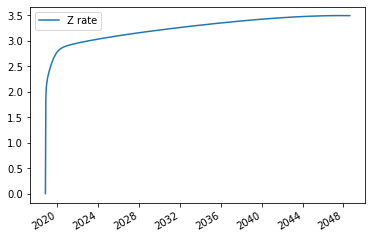

In [31]:
grafica = disc_factor.plot( y='Z rate',  kind='line')
